# Instructions

For each of these exercises, create a cell underneath it. If the exercise says "Markdown Exercise" then the cell should be a markdown, or text cell, and if it says "Coding Exercise" use code to express your answer. Note: You are always welcome to use code in your markdown if you want to communicate something about the code.

## Markdown Exercise

In the `handout-week-07` folder, you have a notebook that achieves the same objective 3 different ways:
  1. The Old School Way
  2. With Pandas, the power of tabular data manipulation
  3. With SciPy, even more straightforward
  


**For this exercise, do the following three things:**
 - Create a new notebook with the same name as that notebook (i.e. "3-different-ways...") in this folder.
 - Retype each of those 3 ways. Once you've done so, save your results and return here.
 - Name 3 specific things you have learned in doing that, which you do not want to forget. 

### Markdown Answer

_Student is responsible for writing out their reflection answer._

## Markdown Exercise

### Analogy 2: Recording health intentions from UMD students

Notice that the red stones example is not really that different from asking `n` random students, anonymously, at UMD, whether they are planning on getting the next COVID booster. If you asked every single student, there would be some proportion `p` that are planning to get the next COVID booster.

_Note: A minor item for now, but there is one difference, which we can discuss later -- if curious feel free to ask over Slack._

### Markdown Answer

No question here. Steven's mistake.

## Coding Exercise

Assume n = 10 (we are going to survey 10 students), and p = .37 (just like before).

Using whatever method you want, create a dictionary with an appropriate name and an associated bar chart displaying the probability distribution of the number of students who intend to get a COVID booster when randomly sampling 10 of them.

### Coding Answer

There is a 0.0098 probability that 0 students in a sample of 10 are planning to get the next booster.
There is a 0.0578 probability that 1 students in a sample of 10 are planning to get the next booster.
There is a 0.1529 probability that 2 students in a sample of 10 are planning to get the next booster.
There is a 0.2394 probability that 3 students in a sample of 10 are planning to get the next booster.
There is a 0.2461 probability that 4 students in a sample of 10 are planning to get the next booster.
There is a 0.1734 probability that 5 students in a sample of 10 are planning to get the next booster.
There is a 0.0849 probability that 6 students in a sample of 10 are planning to get the next booster.
There is a 0.0285 probability that 7 students in a sample of 10 are planning to get the next booster.
There is a 0.0063 probability that 8 students in a sample of 10 are planning to get the next booster.
There is a 0.0008 probability that 9 students in a sample of 10 are planning to ge

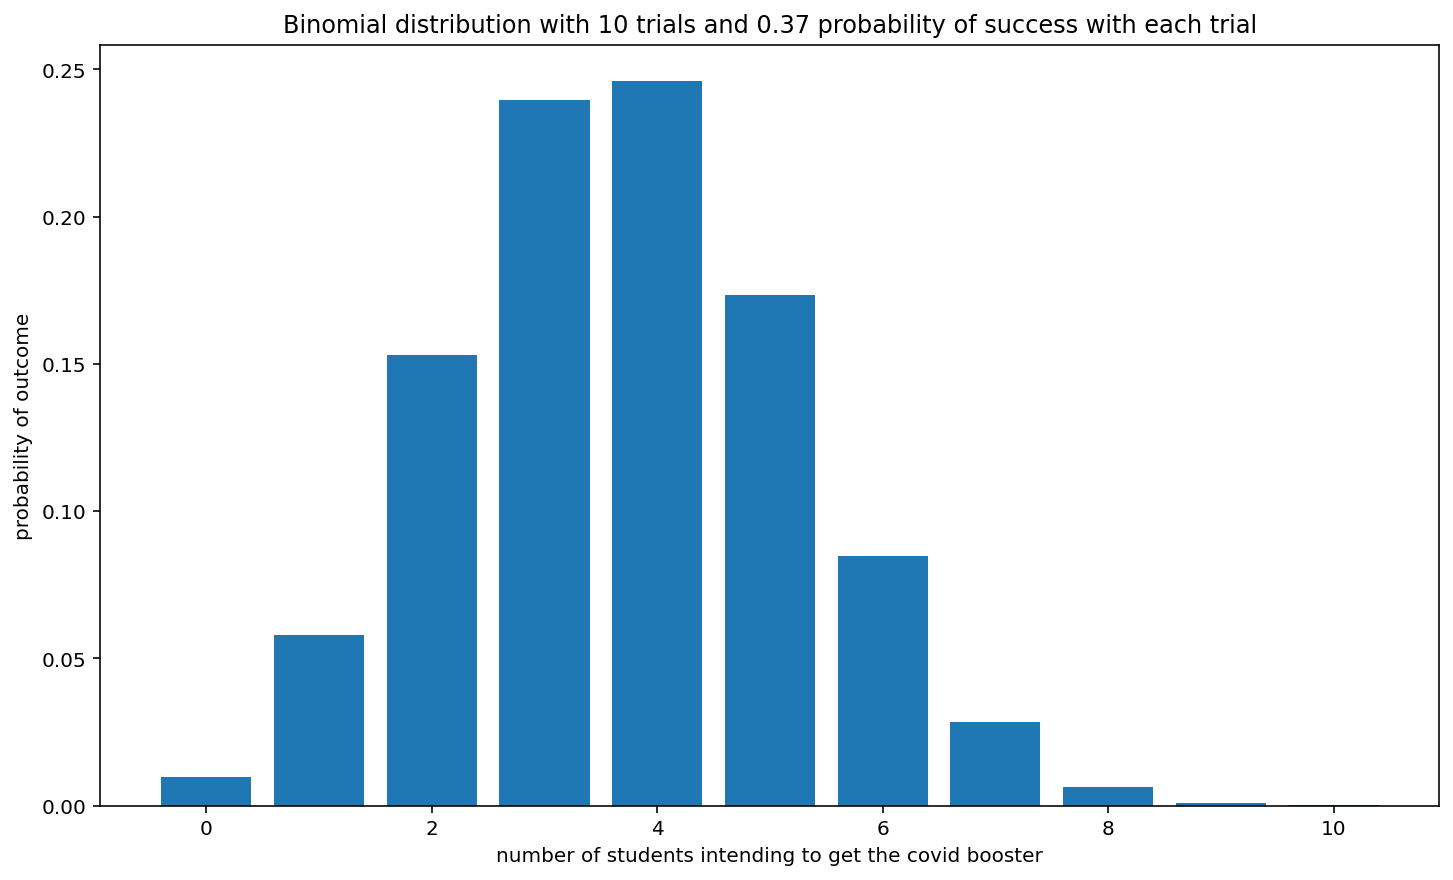

In [1]:
# import statements
from scipy.stats import binom
import matplotlib.pyplot as plt

# parameters of distribution
n, p = 10, .37

# defining random variable object
rv = binom(n, p)
num_students_pro_booster_to_probability = {}
for num in range(n+1):
    num_students_pro_booster_to_probability[num] = rv.pmf(num)

# print dictionary contents
for num, prob in num_students_pro_booster_to_probability.items():
    print(f"There is a {prob:.4f} probability that {num} students in a sample of {n} are planning to get the next booster.")

# show probability distribution chart
plt.bar(num_students_pro_booster_to_probability.keys(), num_students_pro_booster_to_probability.values())
plt.title(f'Binomial distribution with {n} trials and {p} probability of success with each trial')
plt.xlabel('number of students intending to get the covid booster')
plt.ylabel('probability of outcome')
plt.show()

## Markdown Exercise

What is the expected number of students that will have the intention of getting a COVID booster?

### Markdown Answer 

The expected number of students is $np$, which is 10*.37 = 3.7.

## Coding Exercise

What is the expected number of students that will have the intention of getting a COVID booster?

### Coding Answer

In [2]:
# option 1

running_total = 0
for num, prob in num_students_pro_booster_to_probability.items():
    running_total += num*prob
print(running_total, "is the computed expectation from the probability distribution.")

3.699999999999998 is the computed expectation from the probability distribution.


In [3]:
# option 2

rv.mean()

3.7

## Markdown Exercise

Using the graph above, try to mentally compute the probability that, of the 10 students surveyed, more than half of them intend to get the COVID booster.

### Markdown Answer

It looks like .12 is the probability that more than half of the students sampled have the intention of getting the COVID booster.

## Coding Exercise

Use the dictionary you created to determine the exact probability that more than half of the 10 students get the COVID booster.

### Coding Answer

In [4]:
running_total = 0
for num, prob in num_students_pro_booster_to_probability.items():
    if num > n/2:
        running_total += prob
print(f"When there is {p} of the student body that intends to get the COVID booster, "
      f"and we sample {n} of them, there is a {running_total:4f} probability that over half "
      "of the sample intend to get the COVID booster.")

When there is 0.37 of the student body that intends to get the COVID booster, and we sample 10 of them, there is a 0.120503 probability that over half of the sample intend to get the COVID booster.


## Coding Exercise

Run this code:

```python
n, p = 10, .37
from scipy.stats import binom
rv = binom(n, p)
print(rv.cdf(5))
```

### Coding Answer (Easy)

In [5]:
n, p = 10, .37
from scipy.stats import binom
rv = binom(n, p)
print(rv.cdf(5))

0.8794974190480621


## Markdown Exercise

If you compare the output from the last 3 exercises, are they similar, different; how and why? You may need to look up what you are not familiar with in the official SciPy documentation (i.e. the `cdf` method). 

_In this question, I want you to explain what you think is going on. (If you are confused at this point, after reading and thinking on your own, feel free to ask someone, to read some additional sources, and then ask on Slack.)_

### Markdown Answer

In a world where there is exactly .37 of the students at UMD who intend to get the next COVID booster, we sample 10 students uniformly at random. The probability of getting at most 5 students out of 10 is roughly a .88 probability. The probability of getting 6 or more (i.e. more than half of the sample) that intend to get the booster is .12.

In fact, `True` will be returned if you evaluate the expression `1 - rv.cdf(5)` will provide the same result as `rv.pmf(6) + rv.pmf(7) + rv.pmf(8) + rv.pmf(9) + rv.pmf(10)`. This is because the probability of the whole space is 1... so, in English, this means the probability of getting at most 5 plus the probability of getting more than 5 is 1.

**Bonus**

You may confirm this claim by using the `np.allclose` function.

```python
import numpy as np
from scipy.stats import binom

n, p = 10, .37
rv = binom(n, p)

left_hand_side = 1 - rv.cdf(5)
right_hand_side = sum([rv.pmf(i) for i in range(6, 11)])

print(np.allclose(left_hand_side, right_hand_side))
```

## Coding Exercise

So, it sure seems that 12% of the time I'm going to get more than half the students in my random sample that are planning to get a booster. So it's not impossible. 

Here's the thing . . . and this is the whole point of statistical inference: 

_You do not know the ground truth, the actual proportion of 0.37 students who intend to get boosted._

For each `i in range(n + 1)`, print the probability that at least `i` will be boosted in a sample of size 10. Write your results in complete sentences.

### Coding Answer

In [6]:
for num_boost_planned in range(n+1):
    probability_at_least_num_boost_planned = 1 - rv.cdf(num_boost_planned - 1)
    print(f"When {p} of UMD students plan to be boosted, the probability "
          f"of at least {num_boost_planned} people that plan to be boosted in "
          f"a sample of size {n} is {probability_at_least_num_boost_planned:.5f}")

When 0.37 of UMD students plan to be boosted, the probability of at least 0 people that plan to be boosted in a sample of size 10 is 1.00000
When 0.37 of UMD students plan to be boosted, the probability of at least 1 people that plan to be boosted in a sample of size 10 is 0.99015
When 0.37 of UMD students plan to be boosted, the probability of at least 2 people that plan to be boosted in a sample of size 10 is 0.93231
When 0.37 of UMD students plan to be boosted, the probability of at least 3 people that plan to be boosted in a sample of size 10 is 0.77943
When 0.37 of UMD students plan to be boosted, the probability of at least 4 people that plan to be boosted in a sample of size 10 is 0.54000
When 0.37 of UMD students plan to be boosted, the probability of at least 5 people that plan to be boosted in a sample of size 10 is 0.29393
When 0.37 of UMD students plan to be boosted, the probability of at least 6 people that plan to be boosted in a sample of size 10 is 0.12050
When 0.37 of 

## Markdown Exercise

So, let's say you conducted this survey to a sample of 10 students where at least 6 said they were going to get boosted. Would you believe it could be the case that .37 are actually going to get boosted? Why? What's your _percentage_ tolerance and what's your reasoning?

### Markdown Answer

I would definitely believe that it _could_ be the case that .37 (or even less) of the population of students plan to be boosted even though 60% of the sample turned out that way. There is a .12 probability of that happening, so I cannot discount that as the reality. I don't know what my percentage tolerance is, but it's definitely lower than 12%.

## Coding Exercise

**Multiverse Challenge** 

In this assignment so far, we just put a stake in the ground saying that .37 was the true proportion of students intending to get boosted this fall. 

Now I want you to imagine infinitely many multiverses, which are characterized by the true percentage of UMD students planning to get boosted this fall. So in each multiverse you have a different actual percentage of UMD students planning to get boosted.

In statistics, if you'll allow me to continue with this metaphor, we do not know which multiverse we're living in!

In this question, I want you to experiment by exploring different multiverse scenarios, to see what the probability of getting at least 6 boost-indending students out of 10 uniformly randomly selected students. 

Print out a few below, use a for loop that explores different values for `p` and print out complete sentences stating what you see. 

_This is exploratory and the values you explore are at your discretion._

### Coding Answer

In [7]:
p_alternates = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
for p_alternate in p_alternates:
    probability_of_at_least_6 = 1 - binom.cdf(5, n, p_alternate)
    print(f"The probability of at least 6 out of {n} students wanting to be boosted, in a multiverse where {p_alternate} "
          f"of UMD students want to be boosted, is {probability_of_at_least_6:.5f}")

The probability of at least 6 out of 10 students wanting to be boosted, in a multiverse where 0 of UMD students want to be boosted, is 0.00000
The probability of at least 6 out of 10 students wanting to be boosted, in a multiverse where 0.1 of UMD students want to be boosted, is 0.00015
The probability of at least 6 out of 10 students wanting to be boosted, in a multiverse where 0.2 of UMD students want to be boosted, is 0.00637
The probability of at least 6 out of 10 students wanting to be boosted, in a multiverse where 0.3 of UMD students want to be boosted, is 0.04735
The probability of at least 6 out of 10 students wanting to be boosted, in a multiverse where 0.4 of UMD students want to be boosted, is 0.16624
The probability of at least 6 out of 10 students wanting to be boosted, in a multiverse where 0.5 of UMD students want to be boosted, is 0.37695
The probability of at least 6 out of 10 students wanting to be boosted, in a multiverse where 0.6 of UMD students want to be boosted

## Coding Exercise

The previous exercise was exploratory. In this exercise, I want you to find (by trial and error) the largest value for `p` which makes it so that there is less than a 5% chance of getting at least 6 students who want to get boosted this fall, out 10 in your sample.

### Coding Answer

For this, I will use the function `np.linspace` to generate many numbers between 0 and 1 and then I will try to find the 5% cut-off. I will also throw in a graph to make this easier to digest.

The largest value for the true proportion of students which makes it so that there is a less than 5% chance of getting at least 6 is 0.3030


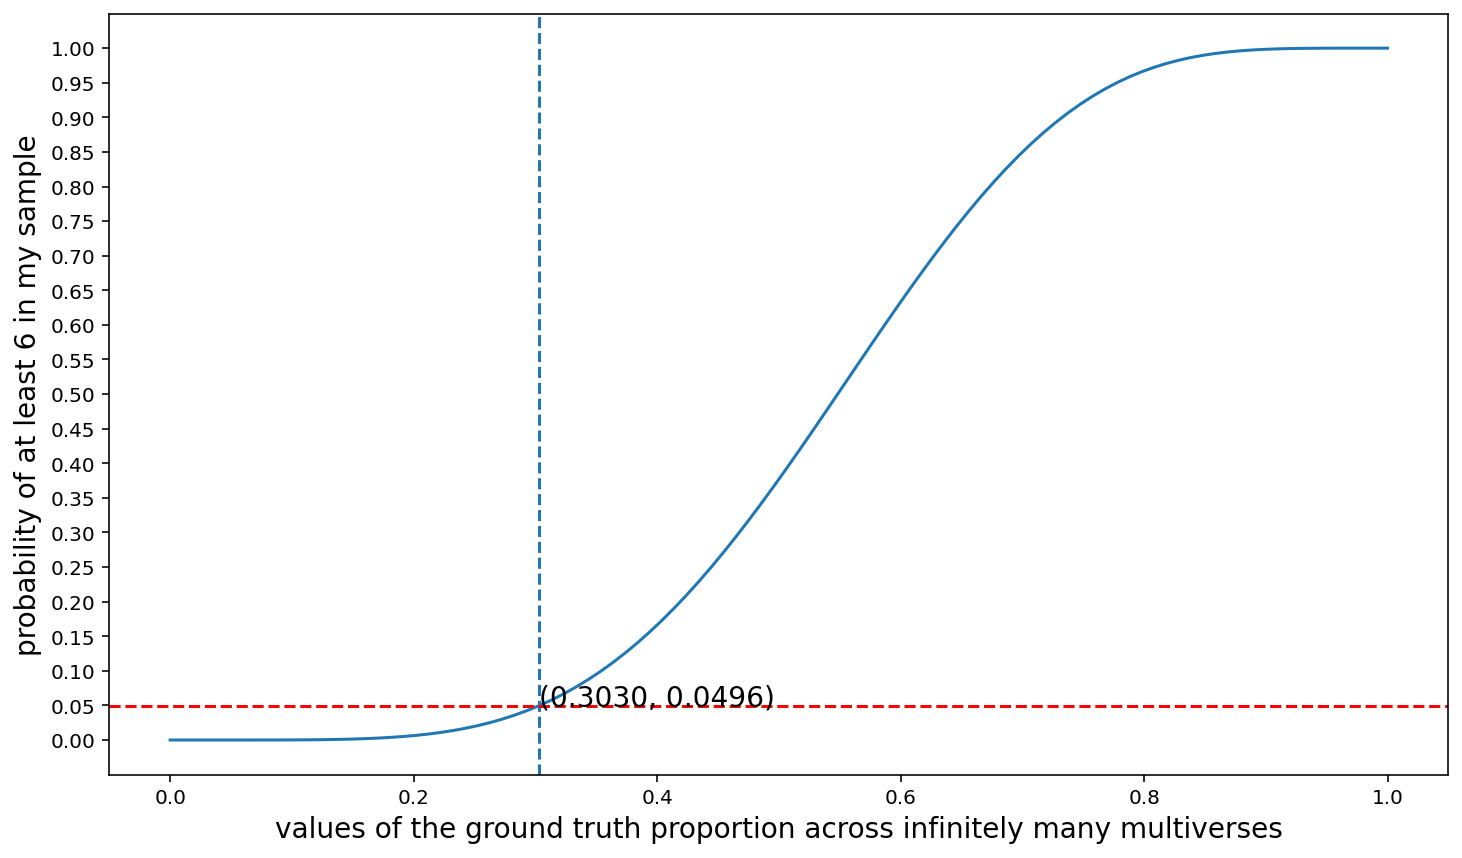

In [8]:
import numpy as np

p_array = np.linspace(0, 1, num=100)
probability_at_least_6_array = 1 - binom.cdf(5, n, p_array)
cut_off_boolean_array = probability_at_least_6_array < .05
cut_off_index = cut_off_boolean_array.argmin() - 1

p_, prob_at_least_6 = p_array[cut_off_index], probability_at_least_6_array[cut_off_index]

print("The largest value for the true proportion of students which makes it so that there "
     f"is a less than 5% chance of getting at least 6 is {p_:.4f}")

fig, ax = plt.subplots()
ax.plot(p_array, probability_at_least_6_array)
ax.set_ylabel("probability of at least 6 in my sample", fontsize=14)
ax.set_xlabel("values of the ground truth proportion across infinitely many multiverses", fontsize=14)
ax.axvline(p_, linestyle='--')
ax.axhline(prob_at_least_6, linestyle='--', color='r')
ax.set_yticks(np.linspace(0, 1, num=21))
ax.annotate(f"({p_:.4f}, {prob_at_least_6:.4f})", xy=(p_, prob_at_least_6), fontsize=14)
plt.show()

## Coding Exercise

Create a simulation of 1000 samples of 10 students from a population with the proportion $p$ you determined in the last exercise and print out the proportion of samples that have at least 6 students that are planning to get boosted. This exercise is analagous to the previous homework assignment. 

_It's just that we are not flipping coins anymore._

### Coding Answer

In [9]:
print(f"{p_:.4f} was what I determined in the last exercise as the largest _true proportion_ "
      f"of students who plan to get boosted, that would yield a smaller than 5% probability of getting at least 6 of {n} in the sample.")

number_of_pro_boost_students_array = binom.rvs(n, p_, size=1000)
(number_of_pro_boost_students_array >= 6).mean()

0.3030 was what I determined in the last exercise as the largest _true proportion_ of students who plan to get boosted, that would yield a smaller than 5% probability of getting at least 6 of 10 in the sample.


0.068